# Importing Libraries and the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, roc_auc_score
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPRegressor

In [2]:
car_data = pd.read_csv("https://github.com/HrantDavtyan/BA_BA/blob/master/car_prices.csv?raw=true")

In [3]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


In [5]:
car_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


## <font color="blue"> Data Transformation </font>

#### <font color="red"> please note that this section is quite long, so you might want to skip ahead to the next section</font>

### dealing with missing data

Market Category has many missing values, thus I think we should drop it. It doesn't really add value to the data since the price, model, make and many other features already speak about the car's market category. 

In [6]:
car_data["Market Category"].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

In [7]:
car_data = car_data.drop("Market Category", axis=1)

In [8]:
car_data["Number of Doors"].mode()

0    4.0
dtype: float64

In [9]:
car_data[['Number of Doors']] = car_data[['Number of Doors']].fillna(value=4)

In [10]:
car_data["Number of Doors"].unique() #no more missing values

array([2., 4., 3.])

In [11]:
car_data["Engine Cylinders"].mode()

0    4.0
dtype: float64

In [12]:
car_data[['Engine Cylinders']] = car_data[['Engine Cylinders']].fillna(value=4)

In [13]:
car_data["Engine Cylinders"].unique()

array([ 6.,  4.,  5.,  8., 12.,  0., 10.,  3., 16.])

In [14]:
car_data["Engine HP"].unique()

array([ 335.,  300.,  230.,  320.,  172.,  160.,  130.,  158.,  240.,
        248.,  162.,  217.,  184.,  295.,  115.,  140.,  155.,  114.,
        100.,  241.,  180.,  177.,  228.,  121.,  148.,  194.,  218.,
        161.,  292.,  250.,  255.,  222.,   82.,  134.,  306.,  400.,
        425.,  350.,  332.,  268.,  282.,  275.,  201.,  442.,  562.,
        597.,  237.,  270.,  445.,  443.,  302.,  322.,  315.,   nan,
        101.,  135.,  485.,  238.,  515.,  543.,  631.,  604.,  620.,
        611.,  661.,  157.,  402.,  389.,  110.,  532.,  170.,  165.,
        125.,  641.,  535.,  153.,  144.,  188.,  372.,  108.,  168.,
        190.,  205.,  200.,  227.,  173.,  220.,  210.,  280.,  207.,
        265.,  260.,  290.,  285.,  390.,  225.,  185.,  150.,  430.,
        520.,  560.,  475.,  500.,  540.,  370.,  580.,  420.,  345.,
        195.,  193.,  208.,  181.,  236.,  186.,  252.,  310.,  333.,
        340.,  450.,  281.,  288.,  138.,  137.,  106.,  271.,  196.,
        212.,  278.,

In [15]:
car_data[['Engine HP']] = car_data[['Engine HP']].fillna(value= np.mean(car_data["Engine HP"]))

In [16]:
car_data["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [17]:
car_data[['Engine Fuel Type']] = car_data[['Engine Fuel Type']].fillna(method='ffill')

In [18]:
car_data["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

In [19]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 15 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11914 non-null object
Engine HP            11914 non-null float64
Engine Cylinders     11914 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11914 non-null float64
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 1.4+ MB


#### <font color='red'>No more missing values, YAY!</font>

### dealing with objects

In [20]:
car_data["Vehicle Size"].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

clearly, Vehicle Size can be turned into ordinal numeric variables

In [21]:
car_data["Vehicle Size"] = car_data["Vehicle Size"].astype("category").cat.reorder_categories(["Compact","Midsize","Large"]).cat.codes

In [22]:
Vehicle_Style = pd.get_dummies(car_data["Vehicle Style"])

In [23]:
car_data = car_data.drop(["Vehicle Style"], axis=1)

In [24]:
car_data = car_data.join(Vehicle_Style)

In [25]:
car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,...,Convertible,Convertible SUV,Coupe,Crew Cab Pickup,Extended Cab Pickup,Passenger Minivan,Passenger Van,Regular Cab Pickup,Sedan,Wagon
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,0,...,0,0,1,0,0,0,0,0,0,0
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,0,...,1,0,0,0,0,0,0,0,0,0
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,0,...,0,0,1,0,0,0,0,0,0,0
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,0,...,0,0,1,0,0,0,0,0,0,0
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,0,...,1,0,0,0,0,0,0,0,0,0


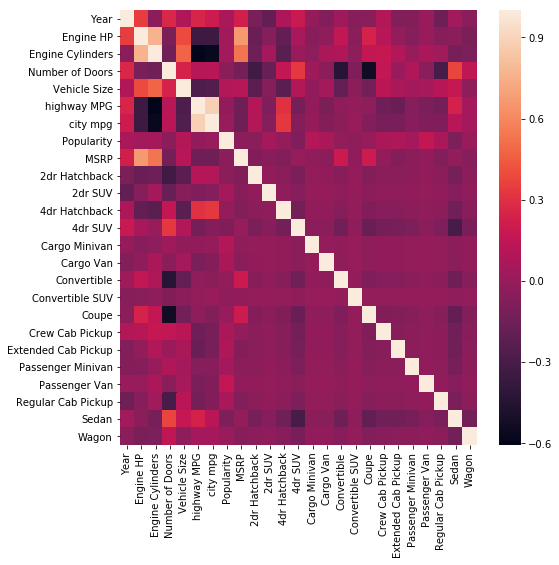

In [26]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(car_data.corr(), ax=ax)
plt.show()

###### i am going to drop both city MPG and highway MPG, due to: 1-degrees of freedom, 2-both show same thing. I will also be dropping coupe, since it is highly correlated with number of doors, whcih makes sense. 

In [27]:
car_data = car_data.drop(["city mpg"], axis=1)

In [28]:
car_data=car_data.drop(["highway MPG"], axis=1)

In [29]:
car_data = car_data.drop(["Coupe"], axis=1)

In [30]:
car_data.Driven_Wheels.unique()

array(['rear wheel drive', 'front wheel drive', 'all wheel drive',
       'four wheel drive'], dtype=object)

In [31]:
driven_wheels = pd.get_dummies(car_data.Driven_Wheels)

In [32]:
car_data = car_data.drop("Driven_Wheels", axis=1)

In [33]:
car_data=car_data.join(driven_wheels)

In [34]:
car_data = car_data.drop(["all wheel drive"], axis=1) #due to degrees of freedom

In [35]:
car_data["Transmission Type"].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

In [36]:
transmission = pd.get_dummies(car_data["Transmission Type"])

In [37]:
car_data = car_data.drop(["Transmission Type"], axis=1)

In [38]:
car_data = car_data.join(transmission)

In [39]:
car_data = car_data.drop("UNKNOWN", axis=1) #DoF

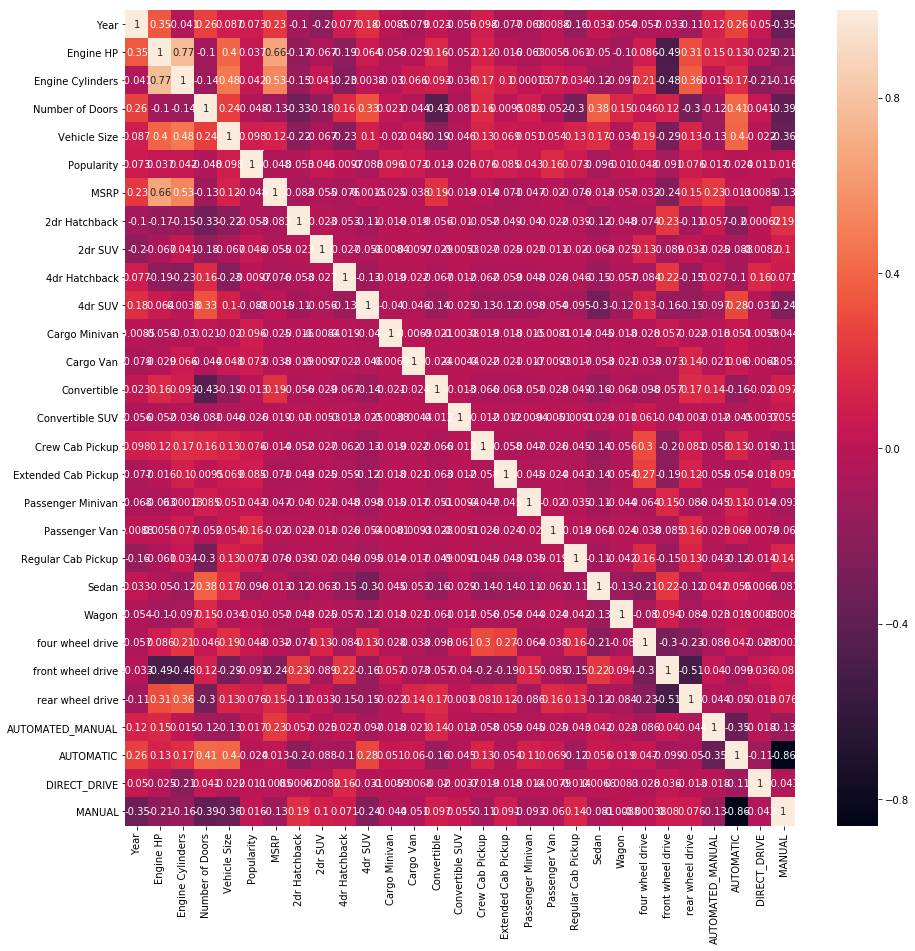

In [40]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(car_data.corr(), annot=True, ax=ax)
plt.show()

###### with this huge heatmap i realized that engine cylinders and engine hp also have high correlation (0.77), thus i decided to drop engine cylinders since it is less correlated with MSRP (what we are trying to predict)

In [41]:
Engine_Cylinder = car_data["Engine Cylinders"] #in case i later need this

In [42]:
car_data = car_data.drop("Engine Cylinders", axis=1)

In [43]:
car_data["Engine Fuel Type"].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)'], dtype=object)

In [44]:
fuel_type = pd.get_dummies(car_data["Engine Fuel Type"])

In [45]:
car_data=car_data.drop("Engine Fuel Type", axis=1)

In [46]:
car_data=car_data.join(fuel_type)

In [47]:
car_data=car_data.drop("flex-fuel (unleaded/natural gas)", axis=1) #DoF

In [48]:
car_data.Model.unique()

array(['1 Series M', '1 Series', '100', '124 Spider', '190-Class',
       '2 Series', '200', '200SX', '240SX', '240', '2',
       '3 Series Gran Turismo', '3 Series', '300-Class', '3000GT', '300',
       '300M', '300ZX', '323', '350-Class', '350Z', '360', '370Z', '3',
       '4 Series Gran Coupe', '4 Series', '400-Class', '420-Class',
       '456M', '458 Italia', '4C', '4Runner', '5 Series Gran Turismo',
       '5 Series', '500-Class', '500e', '500', '500L', '500X', '550',
       '560-Class', '570S', '575M', '57', '599', '5',
       '6 Series Gran Coupe', '6 Series', '600-Class', '6000',
       '612 Scaglietti', '626', '62', '650S Coupe', '650S Spider', '6',
       '7 Series', '718 Cayman', '740', '760', '780', '8 Series', '80',
       '850', '86', '9-2X', '9-3 Griffin', '9-3', '9-4X', '9-5', '9-7X',
       '9000', '900', '90', '911', '928', '929', '940', '944', '960',
       '968', 'A3', 'A4 allroad', 'A4', 'A5', 'A6', 'A7', 'A8',
       'Acadia Limited', 'Acadia', 'Accent', 'Acclaim'

###### since basically every other variable in the dataframe ultimately can tell us what model a car is, and since the vatiable "Model" has so many different values which will only heavily load our dataset, I have decided to drop it.

In [49]:
car_data = car_data.drop('Model', axis=1)

In [50]:
make = pd.get_dummies(car_data.Make)

In [51]:
car_data=car_data.drop("Make", axis=1)

In [52]:
car_data=car_data.join(make)

In [53]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 85 columns):
Year                                            11914 non-null int64
Engine HP                                       11914 non-null float64
Number of Doors                                 11914 non-null float64
Vehicle Size                                    11914 non-null int8
Popularity                                      11914 non-null int64
MSRP                                            11914 non-null int64
2dr Hatchback                                   11914 non-null uint8
2dr SUV                                         11914 non-null uint8
4dr Hatchback                                   11914 non-null uint8
4dr SUV                                         11914 non-null uint8
Cargo Minivan                                   11914 non-null uint8
Cargo Van                                       11914 non-null uint8
Convertible                                     11914 non-nu

## <font color="blue">Model Application</font>


In [54]:
x = car_data.drop("MSRP", axis=1)

In [55]:
y = car_data["MSRP"]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [57]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
from sklearn.metrics import mean_squared_error

#### <font color="red">MLP Regressor</font>

In [59]:
mlp_reg = MLPRegressor(random_state=42, activation="relu", hidden_layer_sizes=(170,170,170), max_iter=10000, solver="adam")

In [60]:
mlp_reg.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(170, 170, 170), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [61]:
mlp_reg.score(x_train, y_train)*100

76.91315776231995

In [62]:
mlp_reg.score(x_test, y_test)*100

74.28456109027799

In [63]:
prediction_mlp = mlp_reg.predict(x_test)

In [64]:
print(np.sqrt(mean_squared_error(y_test,prediction_mlp)))

24757.735795839566


#### <font color="red">Random Forrest Regressor </font>

In [65]:
rf_reg = RandomForestRegressor(random_state=42)

In [66]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [67]:
rf_reg.score(x_train, y_train)*100

97.95660871717493

In [68]:
rf_reg.score(x_test, y_test)*100

97.16910892576315

In [69]:
prediction_rf=rf_reg.predict(x_test)

In [70]:
print(np.sqrt(mean_squared_error(y_test, prediction_rf)))

8214.394060093204


#### <font color="red">Gradient Boosting Regressor </font>

In [71]:
gb_reg = GradientBoostingRegressor(random_state=42)

In [72]:
gb_reg.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [73]:
gb_reg.score(x_train, y_train)*100

96.38803874686873

In [74]:
gb_reg.score(x_test, y_test)*100

94.58582677026708

In [75]:
prediction_gb=gb_reg.predict(x_test)

In [76]:
print(np.sqrt(mean_squared_error(y_test, prediction_gb)))

11360.04435279028


#### <font color="red">Decision Tree Regressor </font>

In [77]:
dt_reg=DecisionTreeRegressor(random_state=42) #hyperparameter tuning did not help in this case to improve the model

In [78]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [79]:
dt_reg.score(x_train, y_train)*100

99.33121105797917

In [80]:
dt_reg.score(x_test, y_test)*100

97.02160563260504

### <font color="green"> after evaluating all the models, I think that the best one is <font color="gray">Random Forest Regressor </font>, since it has the least overfitting and the least root mean squared error

## feature importances

In [81]:
importances_rf = rf_reg.feature_importances_


In [82]:
features = pd.DataFrame(data=importances_rf, columns = ["importances_rf"], index = x.columns)


In [83]:
selected = features[features.importances_rf>=0.1]


In [84]:
selected

,importances_rf
Engine HP,0.601761
Popularity,0.105130
Bugatti,0.120130


In [85]:
selected_features = selected.index

In [86]:
print(selected_features)

Index(['Engine HP', 'Popularity', 'Bugatti'], dtype='object')


In [87]:
x_train_new = x_train[selected_features]

In [88]:
rf_reg.fit(x_train_new, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [89]:
np.round(rf_reg.predict([[0.5,0.6,0]]), 2)

array([10275.83])

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -




# <font color="orange"> Overpriced Cars </font>

In [90]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [108]:
real_price = np.array(car_data.MSRP)

In [113]:
predicted_price = np.array(np.round(rf_reg.predict(x), 0))

In [132]:
difference = np.array(real_price-predicted_price)

In [133]:
difference>0  #the ones who are overpriced should have the "True" value

array([False, False, False, ...,  True,  True, False])

In [146]:
difference.tolist()

[-11722.0,
 -3096.0,
 -2140.0,
 -1840.0,
 -810.0,
 -90.0,
 1080.0,
 -1090.0,
 1590.0,
 0.0,
 -790.0,
 427.0,
 630.0,
 0.0,
 427.0,
 -148.0,
 -3150.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -248.0,
 -2748.0,
 452.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -43.0,
 -3804.0,
 -2870.0,
 -372.0,
 -900.0,
 -1625.0,
 -6265.0,
 -3618.0,
 -5150.0,
 1628.0,
 -1130.0,
 -930.0,
 860.0,
 -405.0,
 2282.0,
 -1198.0,
 -396.0,
 3284.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 356.0,
 -864.0,
 -2165.0,
 -2819.0,
 1811.0,
 -710.0,
 -4011.0,
 1789.0,
 -180.0,
 -2060.0,
 -3516.0,
 1564.0,
 -316.0,
 -1516.0,
 -2530.0,
 -650.0,
 999.0,
 -3196.0,
 4.0,
 -1535.0,
 2109.0,
 -3691.0,
 -1196.0,
 -35.0,
 -35.0,
 -35.0,
 -29.0,
 -29.0,
 -29.0,
 0.0,
 0.0,
 -545.0,
 448.0,
 255.0,
 63.0,
 335.0,
 260.0,
 666.0,
 1060.0,
 474.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 508.0,
 -982.0,
 517.0,
 -973.0,
 571.0,
 -919.0,
 118.0,
 -1372.0,
 715.0,
 -775.0,
 0.0,
 -1490.0,
 -8

In [147]:
real_price.tolist()

[46135,
 40650,
 36350,
 29450,
 34500,
 31200,
 44100,
 39300,
 36900,
 37200,
 39600,
 31500,
 44400,
 37200,
 31500,
 48250,
 43550,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 27495,
 24995,
 28195,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 32850,
 38650,
 48750,
 34850,
 40650,
 44150,
 32850,
 46150,
 50750,
 46450,
 49050,
 51050,
 44450,
 38950,
 33150,
 35150,
 40950,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 25170,
 23950,
 29370,
 21995,
 26625,
 30825,
 21995,
 27795,
 31785,
 29905,
 22490,
 27570,
 25690,
 24490,
 29905,
 31785,
 26685,
 22490,
 25690,
 30900,
 27795,
 21995,
 24490,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2073,
 3713,
 3520,
 3910,
 4182,
 4107,
 4299,
 4693,
 4107,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 2000,
 16020,
 14530,
 16860,
 15370,
 17050,
 15560,
 16210,
 14720,
 17050,
 15560,
 16210,
 14720,
 47250,
 41850,
 41850,
 43000,
 49200,
 49650,
 43950,
 419

In [148]:
predicted_price.tolist()

[57857.0,
 43746.0,
 38490.0,
 31290.0,
 35310.0,
 31290.0,
 43020.0,
 40390.0,
 35310.0,
 37200.0,
 40390.0,
 31073.0,
 43770.0,
 37200.0,
 31073.0,
 48398.0,
 46700.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 27743.0,
 27743.0,
 27743.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2043.0,
 36654.0,
 41520.0,
 49122.0,
 35750.0,
 42275.0,
 50415.0,
 36468.0,
 51300.0,
 49122.0,
 47580.0,
 49980.0,
 50190.0,
 44855.0,
 36668.0,
 34348.0,
 35546.0,
 37666.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 2000.0,
 24814.0,
 24814.0,
 31535.0,
 24814.0,
 24814.0,
 31535.0,
 26006.0,
 26006.0,
 31965.0,
 31965.0,
 26006.0,
 26006.0,
 26006.0,
 26006.0,
 32435.0,
 32435.0,
 25686.0,
 25686.0,
 25686.0,
 32435.0,
 25686.0,
 25686.0,
 25686.0,
 2035.0,
 2035.0,
 2035.0,
 2029.0,
 2029.0,
 2029.0,
 2000.0,
 2000.0,
 2618.0,
 3265.0,
 3265.0,
 3847.0,
 3847.0,
 3847.0,
 3633.0,
 3633.0,
 3633.0,
 200

#### after trying a couple of ways, I still couldn't get the three lists into one dataframe in order to visualize the overpriced cars. Anyways, it could be found from the boolean list as well. 